In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('alzheimer.csv')
df.head(10)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,Nondemented,M,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,Nondemented,M,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [2]:
df.dtypes

Group     object
M/F       object
Age        int64
EDUC       int64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
dtype: object

In [3]:
def group_clean(df, column):
    '''Turns the Group column to numeric'''
    df['Group'] = np.where(df['CDR'] == 0.0, 0,
                       np.where(df['CDR'] == 0.5, 1,
                                np.where(df['CDR'] == 1.0, 1,
                                         np.where(df['CDR'] == 2.0, 1, 0))))
    return df

df = group_clean(df, 'Group')


In [4]:
def mf_clean(df, column):
    '''Turns the gender column numeric'''
    df['M/F'] = np.where(df['M/F'] == 'M', 0,
                     np.where(df['M/F'] == 'F', 1,1))
    return df
df = mf_clean(df, 'M/F')

In [5]:
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,0,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,0,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,1,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [6]:
df.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

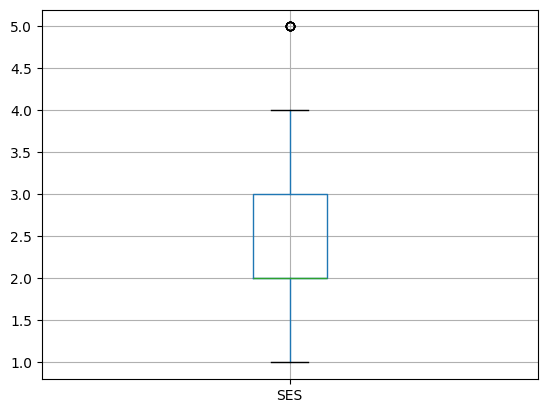

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def ses_outliers(df, column):
    '''SES Boxplot'''
    df.boxplot(column=['SES'], return_type='axes')
    plt.show()

SES_bloxplot = ses_outliers(df, 'SES')

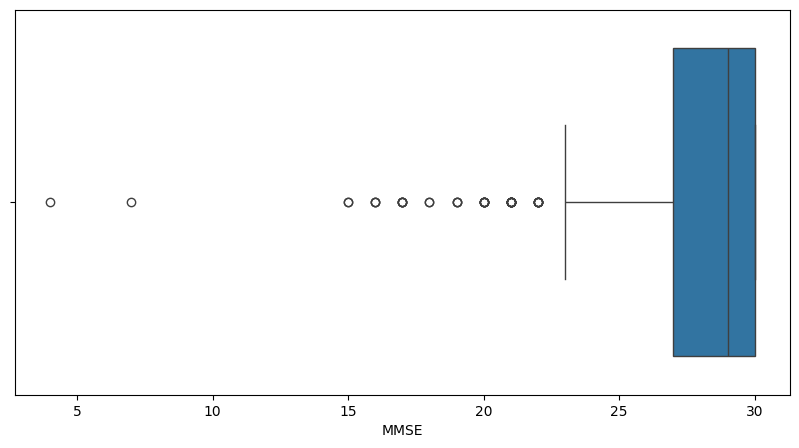

In [8]:
def mmse_outliers(df, column):
    '''MMSE Boxplot'''
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['MMSE'])
    plt.show()

MMSE_Boxplot = mmse_outliers(df, 'MMSE')

SES only has one outlier and MMSE has more, but they follow the tail of the boxplot. Because of this and the fact that the data is a smaller dataset, I will replace the null values with the mean values of the particular column.

In [9]:
SES_mean = df['SES'].mean()
SES_mean

2.4604519774011298

In [10]:
MMSE_mean = df['MMSE'].mean()
MMSE_mean

27.342318059299192

In [11]:
def null_clean_ses(df, column):
    '''replaces nulls in SES column with mean'''
    ses_mean = df['SES'].mean()
    df['SES'].fillna(ses_mean, inplace=True)
    
    return df

df = null_clean_ses(df, 'SES') 

C:\Users\wrnaf\AppData\Local\Temp\ipykernel_3396\3753147228.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SES'].fillna(ses_mean, inplace=True)


In [12]:
def null_clean_mmse(df, column):
    '''replaces nulls in MMSE column with mean'''
    mmse_mean = df['MMSE'].mean()
    df['MMSE'].fillna(mmse_mean, inplace=True)
    
    return df

df = null_clean_mmse(df, 'SES') 

C:\Users\wrnaf\AppData\Local\Temp\ipykernel_3396\2268834586.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MMSE'].fillna(mmse_mean, inplace=True)


In [13]:
df.isnull().sum()


Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [14]:
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,0,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,1,0,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,0,1,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,0,1,63,13,2.000000,30.0,0.0,1327,0.796,1.323


Group	M/F	Age	EDUC	SES	MMSE	CDR	eTIV	nWBV	ASF

In [15]:
cleaned_df = df.rename({'Group': 'Result', 'M/F': 'Gender','EDUC': 'Education_yrs','SES':'Social Status',
                        'MMSE':'Mental State Exam','CDR':'Dementated Severity','eTIV':'Intracranial Volume',
                        'nWBV': 'Brain Volume','ASF':'Atlas Scaling Factor'}, axis=1)
cleaned_df

,Result,Gender,Age,Education_yrs,Social Status,Mental State Exam,Dementated Severity,Intracranial Volume,Brain Volume,Atlas Scaling Factor
0,0,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,0,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,1,0,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,0,1,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,0,1,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [16]:
Dementated_df = pd.get_dummies(cleaned_df['Dementated Severity'])


In [17]:
cleaned_df = cleaned_df.join(Dementated_df)
cleaned_df

,Result,Gender,Age,Education_yrs,Social Status,Mental State Exam,Dementated Severity,Intracranial Volume,Brain Volume,Atlas Scaling Factor,0.0,0.5,1.0,2.0
0,0,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,True,False,False,False
1,0,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876,True,False,False,False
2,1,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046,False,True,False,False
3,1,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010,False,True,False,False
4,1,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,0,82,16,1.000000,28.0,0.5,1693,0.694,1.037,False,True,False,False
369,1,0,86,16,1.000000,26.0,0.5,1688,0.675,1.040,False,True,False,False
370,0,1,61,13,2.000000,30.0,0.0,1319,0.801,1.331,True,False,False,False
371,0,1,63,13,2.000000,30.0,0.0,1327,0.796,1.323,True,False,False,False


In [18]:
cleaned_df.to_csv('Cleaned_Alzheimers.csv', index=False)
